In [2]:
#importing libraries
import pandas as pd
import pandas_datareader as pdr
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
#gathering stock data of samsung electronics (samsung) from yahoo finance
df_samsung = pdr.get_data_yahoo("SMSN.IL")

In [4]:
#printing all the columns
df_samsung.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

<AxesSubplot: xlabel='Date'>

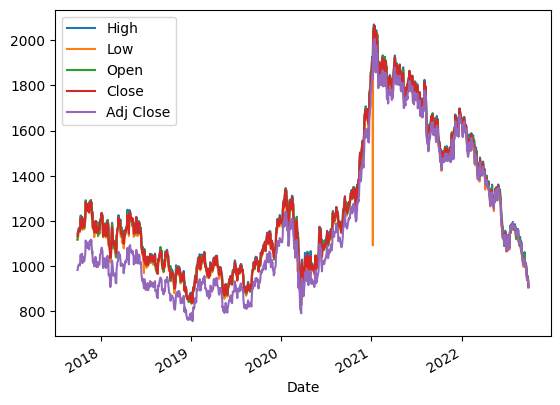

In [5]:
#plotting all the indicators except volume
df_samsung[['High', 'Low', 'Open', 'Close', 'Adj Close']].plot()


<AxesSubplot: title={'center': 'Volume of Samsung Shares Traded'}, xlabel='Date'>

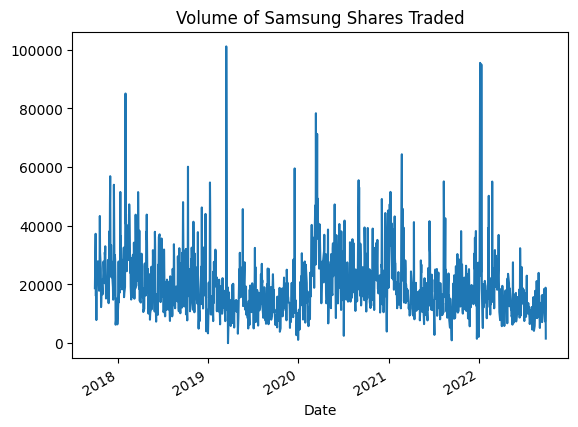

In [6]:
#plotting volume of samsung shares traded
df_samsung["Volume"].plot(title="Volume of Samsung Shares Traded")


In [7]:
#descriptive statistics of samsung close price
df_samsung["Close"].describe()

count    1263.000000
mean     1257.624606
std       295.111085
min       837.000000
25%      1024.500000
50%      1168.000000
75%      1484.000000
max      2064.000000
Name: Close, dtype: float64

<AxesSubplot: title={'center': 'Boxplot of Samsung Close Price'}>

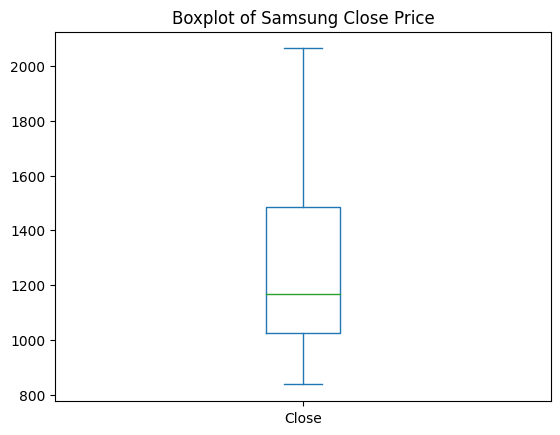

In [8]:
#boxplot of samsung close price
df_samsung["Close"].plot(kind="box", title="Boxplot of Samsung Close Price")


<AxesSubplot: xlabel='Date'>

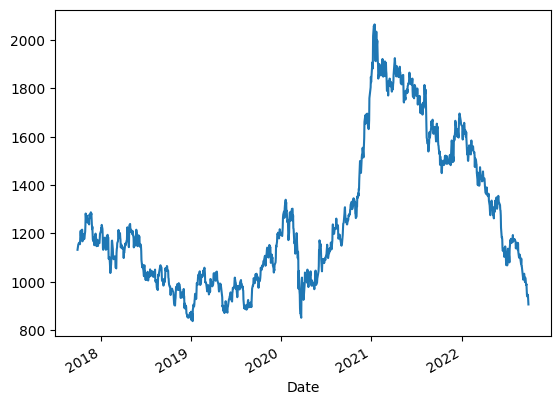

In [9]:
#plotting closing price of samsung
df_samsung['Close'].plot()


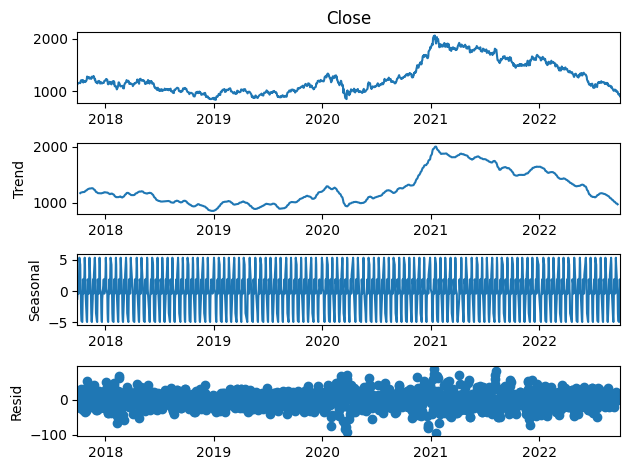

In [10]:
#time series decomposition of close price
dec_result = seasonal_decompose(df_samsung["Close"], model='additive', period = 12)
dec_result.plot()
pyplot.show()


In [11]:
#splitting data into train and test
close = df_samsung["Close"]
train, test= np.split(close, [int(.83 *len(close))])


In [12]:
#checking train-test split percentage
(len(test))/(len(train))


0.20515267175572519

ADF Statistic: -1.2123091411335098
p-value: 0.6682783426911836


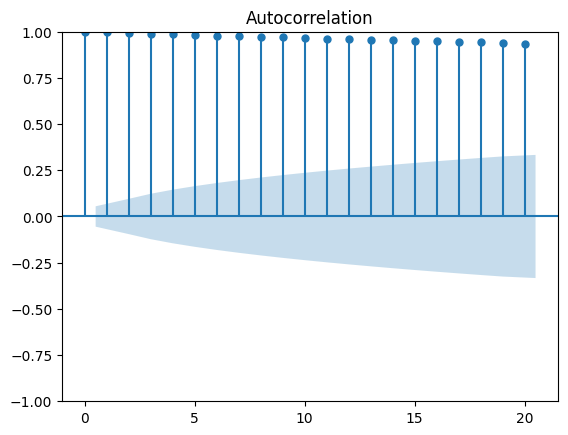

In [16]:
#checking whether samsung's close price is random walk or not
ADF_result = adfuller(close)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
plot_acf(close, lags=20);

<AxesSubplot: >

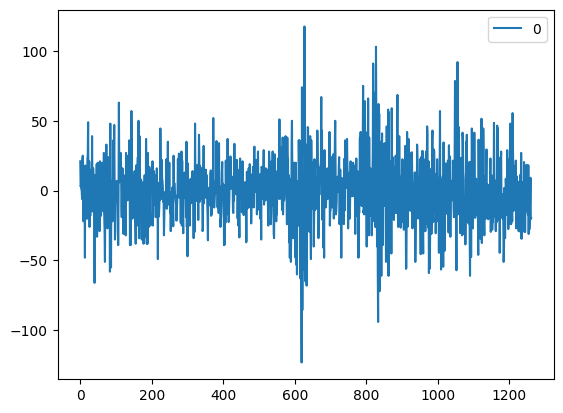

In [18]:
#from the above results we can see that the samsung close price isn't stationary; lets apply differencing
diff_one = np.diff(close, n=1)
pd.DataFrame(diff_one).plot()

ADF Statistic: -35.809456721817156
p-value: 0.0


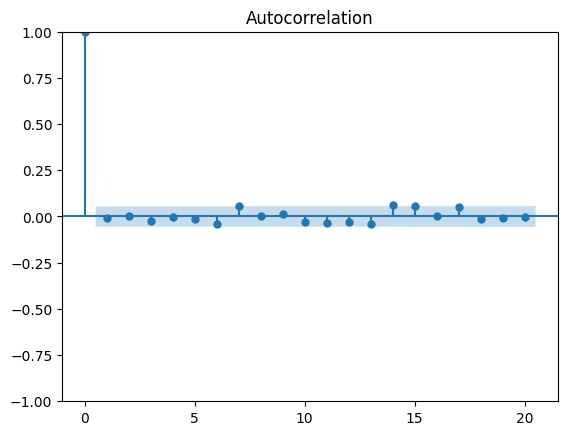

In [19]:
#checking stationarity for differenced close price
ADF_result1 = adfuller(diff_one)
print(f'ADF Statistic: {ADF_result1[0]}')
print(f'p-value: {ADF_result1[1]}')
plot_acf(diff_one, lags=20);